## Create a shell of particles, uniformly distributed

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/oliver/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['inf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
rMin=500 #min radius in Mpc
rMax=2000 # max radius
nParticles=int(1e6) # number of particles

In [16]:
x,y,z,w=[np.zeros(nParticles) for _ in range(4)];i=0
while i<nParticles:
    
    
    
    # draw x,y,z positions and reject if not in sphere:
    rand_pos = -2000.+np.random.rand(3)*4000.;
    r=np.sqrt(np.sum(rand_pos**2.))
    if (r<500.)or(r>2000.):
        continue
    x[i],y[i],z[i]=rand_pos
    w[i]=1.
    i+=1
    if i%100000==0:
        print i

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000


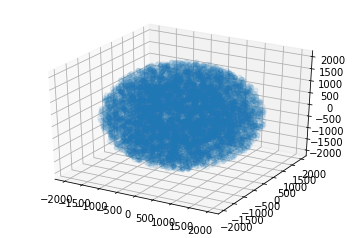

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:10000],y[:10000],z[:10000],alpha=0.1)

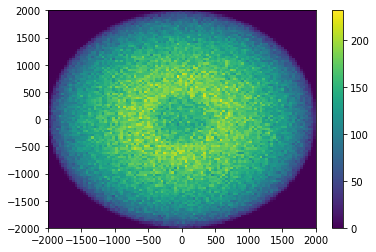

In [33]:
plt.hist2d(x,y,bins=100);
plt.colorbar()

In [37]:
outfile = '../../random_particles/spherical_particles.xyzw'
with open(outfile,"w+") as out:
    for i in range(nParticles):
        out.write("%.8f %.8f %.8f %.8f\n" %(x[i],y[i],z[i],w[i]))

In [47]:
infile = '../../random_particles/spherical_particles.txt'
X,Y,Z,W,J=[np.zeros(nParticles) for _ in range(5)]
for l,line in enumerate(open(infile,"r")):
    splitline=line.split(' ')
    X[l],Y[l],Z[l],W[l],J[l]=splitline

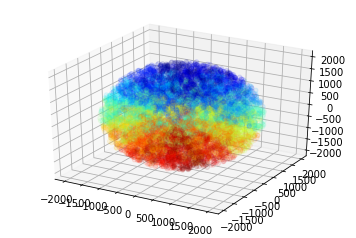

In [57]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:10000],Y[:10000],Z[:10000],c=J[:10000],alpha=0.1,cmap='jet')
#ax.add_colorbar()#'jet')

In [5]:
def xi_i(r):
    if r>1.:
        return r**-2.
    else:
        return 0.
def xi(r):
    return np.asarray([xi_i(ri) for ri in r])

Read in from the xi_QPM file for scaling:

In [6]:
infile='../xi_functions/QPM_Mash.xi';rad_fn=[]; r_vals=[];mu_vals=[];
with open(infile,"r") as inf:
    for l,line in enumerate(inf):
        if l==0:
            for x in line.split():
                r_vals.append(float(x))
        if l==1:
            for x in line.split():
                mu_vals.append(float(x))
        if l>1:
            rad_fn.append(float(line.split()[0]))
r_vals=np.asarray(r_vals)
rad_fn=np.asarray(rad_fn)
mu_vals=np.asarray(mu_vals)

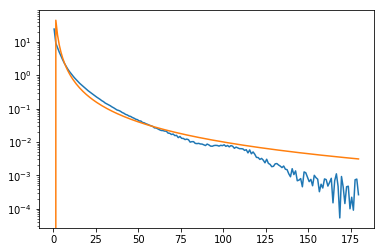

In [7]:
plt.plot(r_vals,rad_fn)
plt.plot(r_vals,100*xi(r_vals))
plt.yscale('log')

In [8]:
np.mean(rad_fn[50:200]/xi(r_vals[50:200]))

53.05115509482597

In [9]:
def xi_fun(r):
    return 100./(r**2.)

In [10]:
outfile='../xi_functions/simple_xi_trunc.xi';
# Write 100/r^2 correlation function to file
with open(outfile,"w+") as out:
    for r in r_vals:
        out.write('%.8e '%r);
    out.write("\n")
    for mu in mu_vals:
        out.write("%.8e " %mu);
    out.write("\n")
    for r in r_vals:
        tmp_xi = xi_fun(r)
        for m in range(len(mu_vals)):
            out.write("%.8e " %tmp_xi)
        out.write('\n')


In [11]:
outfile='../xi_functions/flat_xi.xi';
# Write 100/r^2 correlation function to file
with open(outfile,"w+") as out:
    for r in r_vals:
        out.write('%.8e '%r);
    out.write("\n")
    for mu in mu_vals:
        out.write("%.8e " %mu);
    out.write("\n")
    for r in r_vals:
        tmp_xi = 1.
        for m in range(len(mu_vals)):
            out.write("%.8e " %tmp_xi)
        out.write('\n')
